# Imports

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize

import ast

import warnings
warnings.filterwarnings("ignore")

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
import sklearn.model_selection as ms
import sklearn.preprocessing as preprocess
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


from langdetect import detect
import pyarabic.araby as araby
# !pip install -U gensim
# !pip install -U seaborn

import gensim
import re


import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier


# Rename Labels into -1, 0, and 1

In [7]:
df = pd.read_csv('ar_reviews_100k.csv')
df["label"]=df["label"].str.replace("Positive","1")
df["label"]=df["label"].str.replace("Mixed","0")
df["label"]=df["label"].str.replace("Negative","-1")
df

,label,text
0,1,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
1,1,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2,1,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
3,1,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
4,1,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...
...,...,...
99994,-1,معرفش ليه كنت عاوزة أكملها وهي مش عاجباني من ا...
99995,-1,لا يستحق ان يكون في بوكنق لانه سيئ . لا شي. لا...
99996,-1,كتاب ضعيف جدا ولم استمتع به. فى كل قصه سرد لحا...
99997,-1,مملة جدا. محمد حسن علوان فنان بالكلمات، والوصف...


In [10]:
df= pd.read_csv("freqEncoded.csv")
df.drop(columns=["text","stemmed_text","normalized","clean_text"],axis=1,inplace=True)
df

,label,freq
0,1,"{'متز': 1, 'نوع': 1, 'ما': 1, 'نظف': 1, 'وقع':..."
1,1,"{'احد': 1, 'سبب': 1, 'نجح': 1, 'امر': 2, 'كل':..."
2,1,"{'هدف': 1, 'نقل': 1, 'صخب': 1, 'شرع': 1, 'قهر'..."
3,1,"{'خلص': 3, 'بدء': 1, 'الل': 1, 'بهر': 1, 'زي':..."
4,1,"{'ياس': 1, 'جزء': 2, 'لا': 2, 'دبي': 1, 'ندق':..."
...,...,...
99994,-1,"{'عرفش': 1, 'ليه': 1, 'كنت': 1, 'كمل': 1, 'وهي..."
99995,-1,"{'لا': 3, 'سحق': 1, 'يكون': 1, 'كنق': 1, 'لنه'..."
99996,-1,"{'ضعف': 1, 'جدا': 1, 'ولم': 1, 'متع': 1, 'به':..."
99997,-1,"{'ملة': 1, 'جدا': 1, 'حمد': 1, 'حسن': 1, 'علو'..."


# TF-IDF

In [11]:
def get_freq(words):
  freq=dict()
  for word in words:
      if word in freq:
        freq[word]+=1
      else:
        freq[word]=1
  return freq

In [12]:
df["freq"]=df["text"].apply(get_freq)
df

,label,text,freq
0,1,"[ممتاز, نوعا, ما, النظافة, والموقع, المطعم]","{'ممتاز': 1, 'نوعا': 1, 'ما': 1, 'النظافة': 1,..."
1,1,"[أحد, أسباب, نجاح, كل, شخص, هذه, الدولة, نحن, ...","{'أحد': 1, 'أسباب': 1, 'نجاح': 1, 'كل': 2, 'شخ..."
2,1,"[القاهرة, هدوء, حقيقة, ما, تلك, البلاد, بحق, ا...","{'القاهرة': 1, 'هدوء': 1, 'حقيقة': 1, 'ما': 1,..."
3,1,"[مبدئيا, اللي, زي, الفيل, الازرق, احسن, احمد, ...","{'مبدئيا': 1, 'اللي': 1, 'زي': 2, 'الفيل': 1, ..."
4,1,"[جزء, لا, دبي, فندق, متكامل, الخدمات, مريح, نف...","{'جزء': 1, 'لا': 2, 'دبي': 1, 'فندق': 1, 'متكا..."
...,...,...,...
99994,-1,"[معرفش, ليه, كنت, أكملها, وهي, مش, البداية, ال...","{'معرفش': 1, 'ليه': 1, 'كنت': 1, 'أكملها': 1, ..."
99995,-1,"[لا, يستحق, يكون, بوكنق, لانه, سيئ, لا, شي, لا...","{'لا': 3, 'يستحق': 1, 'يكون': 1, 'بوكنق': 1, '..."
99996,-1,"[كتاب, ضعيف, جدا, ولم, استمتع, به, كل, قصه, سر...","{'كتاب': 1, 'ضعيف': 1, 'جدا': 1, 'ولم': 1, 'اس..."
99997,-1,"[مملة, جدا, محمد, حسن, علوان, والوصف, دقيق, حد...","{'مملة': 1, 'جدا': 1, 'محمد': 1, 'حسن': 1, 'عل..."


In [12]:
#converting string dict to dict
df['freq']=df['freq'].apply(lambda x: ast.literal_eval(x))

,label,freq
0,1,"{'متز': 1, 'نوع': 1, 'ما': 1, 'نظف': 1, 'وقع':..."
1,1,"{'احد': 1, 'سبب': 1, 'نجح': 1, 'امر': 2, 'كل':..."
2,1,"{'هدف': 1, 'نقل': 1, 'صخب': 1, 'شرع': 1, 'قهر'..."
3,1,"{'خلص': 3, 'بدء': 1, 'الل': 1, 'بهر': 1, 'زي':..."
4,1,"{'ياس': 1, 'جزء': 2, 'لا': 2, 'دبي': 1, 'ندق':..."
...,...,...
99994,-1,"{'عرفش': 1, 'ليه': 1, 'كنت': 1, 'كمل': 1, 'وهي..."
99995,-1,"{'لا': 3, 'سحق': 1, 'يكون': 1, 'كنق': 1, 'لنه'..."
99996,-1,"{'ضعف': 1, 'جدا': 1, 'ولم': 1, 'متع': 1, 'به':..."
99997,-1,"{'ملة': 1, 'جدا': 1, 'حمد': 1, 'حسن': 1, 'علو'..."


In [13]:
#joined words into a sentence again to use sklearn model
df["joined_text"]=df["freq"].apply(lambda freq_dict: ' '.join(list(freq_dict.keys())) )
df

,label,freq,joined_text
0,1,"{'متز': 1, 'نوع': 1, 'ما': 1, 'نظف': 1, 'وقع':...",متز نوع ما نظف وقع جهز شاطيء طعم
1,1,"{'احد': 1, 'سبب': 1, 'نجح': 1, 'امر': 2, 'كل':...",احد سبب نجح امر كل شخص هذه دول عشق ترب نحن نحب...
2,1,"{'هدف': 1, 'نقل': 1, 'صخب': 1, 'شرع': 1, 'قهر'...",هدف نقل صخب شرع قهر هدء جبل شيش عرف حقق ما جرى...
3,1,"{'خلص': 3, 'بدء': 1, 'الل': 1, 'بهر': 1, 'زي':...",خلص بدء الل بهر زي فيل زرق حمد راد خطى رحل قرء...
4,1,"{'ياس': 1, 'جزء': 2, 'لا': 2, 'دبي': 1, 'ندق':...",ياس جزء لا دبي ندق كامل خدم ريح نفس وجد
...,...,...,...
99994,-1,"{'عرفش': 1, 'ليه': 1, 'كنت': 1, 'كمل': 1, 'وهي...",عرفش ليه كنت كمل وهي مش عجب حدث بطء ممل روي اط...
99995,-1,"{'لا': 3, 'سحق': 1, 'يكون': 1, 'كنق': 1, 'لنه'...",لا سحق يكون كنق لنه سيء شي وجد خدم فطر صبح ستي...
99996,-1,"{'ضعف': 1, 'جدا': 1, 'ولم': 1, 'متع': 1, 'به':...",ضعف جدا ولم متع به كل قصه سرد لحل شهد بدن فكر
99997,-1,"{'ملة': 1, 'جدا': 1, 'حمد': 1, 'حسن': 1, 'علو'...",ملة جدا حمد حسن علو فنن وصف عند دقق حد ثني قرء...


In [19]:
#Splitting data
x_train,x_test,y_train, y_test = train_test_split(df['joined_text'], df['label'], test_size=0.25, random_state=33)
print("Train: " ,x_train.shape,y_train.shape,"Test: ",(x_test.shape,y_test.shape))

Train:  (74999,) (74999,) Test:  ((25000,), (25000,))


In [20]:
#converting to tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
x_train= vectorizer.fit_transform(x_train)
x_test= vectorizer.fit_transform(x_test)


In [24]:
print("x-training data:",x_train.shape,"\nx-testing data:",x_test.shape)

x-training data: (74999, 3593) 
x-testing data: (25000, 3593)


# Model Selection

## Decision Trees

In [25]:
DT_clf = DecisionTreeClassifier(random_state=33).fit(x_train, y_train)
DT_pred = DT_clf.predict(x_test)

print(classification_report(y_test, DT_pred))


              precision    recall  f1-score   support

          -1       0.56      0.57      0.56      8159
           0       0.46      0.46      0.46      8337
           1       0.57      0.56      0.57      8504

    accuracy                           0.53     25000
   macro avg       0.53      0.53      0.53     25000
weighted avg       0.53      0.53      0.53     25000



<AxesSubplot:>

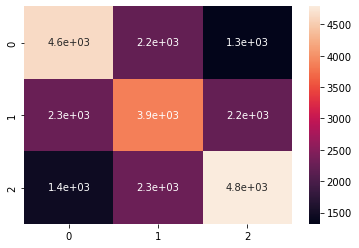

In [41]:
DT_cnf_matrix=confusion_matrix(y_test,DT_pred)
sns.heatmap(DT_cnf_matrix,annot=True)

## Naive Bayes

In [48]:
NV_clf = GaussianNB().fit(x_train.toarray(), y_train)
NV_pred = NV_clf.predict(x_test.toarray())
print(classification_report(y_test, NV_pred))

              precision    recall  f1-score   support

          -1       0.53      0.60      0.56      8159
           0       0.45      0.36      0.40      8337
           1       0.56      0.59      0.57      8504

    accuracy                           0.52     25000
   macro avg       0.51      0.52      0.51     25000
weighted avg       0.51      0.52      0.51     25000



In [58]:
from sklearn.naive_bayes import MultinomialNB
NV_clf = MultinomialNB().fit(x_train, y_train)
NV_pred = NV_clf.predict(x_test)

In [59]:
print(classification_report(y_test, NV_pred))

              precision    recall  f1-score   support

          -1       0.64      0.67      0.66      8159
           0       0.52      0.53      0.53      8337
           1       0.68      0.63      0.66      8504

    accuracy                           0.61     25000
   macro avg       0.61      0.61      0.61     25000
weighted avg       0.61      0.61      0.61     25000



<AxesSubplot:>

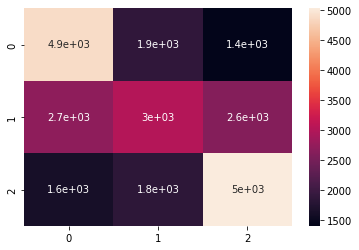

In [49]:
NV_cnf_matrix=confusion_matrix(y_test,NV_pred)
sns.heatmap(NV_cnf_matrix,annot=True)

## Neural Network

In [50]:
NN_clf_stop = MLPClassifier(random_state=33, max_iter=30, hidden_layer_sizes=(16,16), tol=1e-5, early_stopping=True, learning_rate_init=0.01)
NN_clf_stop.fit(x_train, y_train)
NN_pred_stop = NN_clf_stop.predict(x_test)
print(classification_report(y_test, NN_pred_stop))

              precision    recall  f1-score   support

          -1       0.70      0.67      0.68      8159
           0       0.53      0.57      0.55      8337
           1       0.70      0.68      0.69      8504

    accuracy                           0.64     25000
   macro avg       0.64      0.64      0.64     25000
weighted avg       0.64      0.64      0.64     25000



<AxesSubplot:>

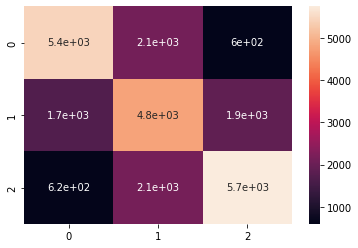

In [51]:
NN_cnf_matrix=confusion_matrix(y_test,NN_pred_stop)
sns.heatmap(NN_cnf_matrix,annot=True)

## SVM

In [52]:
SGD_SVM_clf = make_pipeline(StandardScaler(with_mean=False), SGDClassifier(max_iter=500, tol=1e-3,))
SGD_SVM_clf.fit(x_train, y_train)
SGD_SVM_pred = SGD_SVM_clf.predict(x_test)
print(classification_report(y_test, SGD_SVM_pred))

              precision    recall  f1-score   support

          -1       0.64      0.65      0.65      8159
           0       0.50      0.52      0.51      8337
           1       0.66      0.63      0.64      8504

    accuracy                           0.60     25000
   macro avg       0.60      0.60      0.60     25000
weighted avg       0.60      0.60      0.60     25000



<AxesSubplot:>

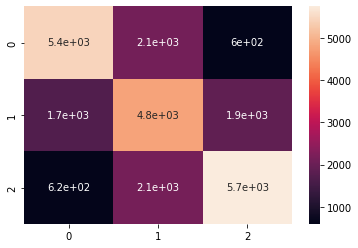

In [53]:
SVM_cnf_matrix=confusion_matrix(y_test,NN_pred_stop)
sns.heatmap(SVM_cnf_matrix,annot=True)

## Logistic Regression

In [56]:
LR_clf = LogisticRegression(max_iter=1000,solver='saga')
LR_clf.fit(x_train,y_train)
LR_pred=LR_clf.predict(x_test)
print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

          -1       0.68      0.70      0.69      8159
           0       0.54      0.53      0.53      8337
           1       0.69      0.68      0.68      8504

    accuracy                           0.64     25000
   macro avg       0.64      0.64      0.64     25000
weighted avg       0.64      0.64      0.64     25000



<AxesSubplot:>

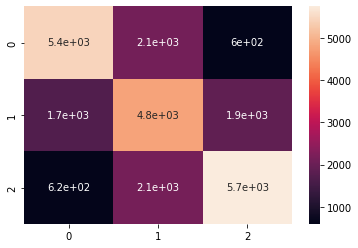

In [57]:
LR_cnf_matrix=confusion_matrix(y_test,NN_pred_stop)
sns.heatmap(LR_cnf_matrix,annot=True)